# 4.04: Regression Modeling and Analysis

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import feather
import csv
import os
from sklearn.preprocessing import StandardScaler
from datetime import datetime
from pickletools import pickle
% matplotlib inline
% config InlineBackend.figure_format = 'retina'

/Users/pk/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
feather_path = '../../../Large Datasets/capstone/feather/'
rep_path = '../../../Large Datasets/capstone/QJPS_6026_supp/'
cap_path = '../../../Large Datasets/capstone/'
feather_files = [file for file in os.listdir(feather_path) if file.endswith('.feather')]
rep_files = os.listdir(rep_path)
cap_files = os.listdir(cap_path)
local_files = [file for file in os.listdir('./') if file.endswith('.csv')]

In [3]:
local_files

['SA1-income-melt-1960-2016.csv',
 'results-2008-2016.csv',
 'SA1-percapinc_infadj-1960-2016.csv',
 'figure-1-lr_df.csv']

In [4]:
# rep_files

---
## Part 1: State-Level Income-Vote Modeling

Most of this was already completed in the [previous notebook](03-data-cleaning-eda.ipynb). The next step is to do it more formally and exhaustively.

In [5]:
st = pd.read_table(rep_path+'st.dat', sep='"', delimiter=' ')

In [6]:
st.sort_values(by=['year','state'], axis=0)

,state,year,stateabb,statefips,total,dem,rep,st.income,state.1,year.1,st.pop,inc.pop,st.repshare,z.st.inc,z.st.pop,z.st.inc.pop
1,Alabama,1952,AL,1,426,275,149,3394166,Alabama,1952,3068000.0,1.106312,0.351415,-0.156279,-0.006731,-0.764112
29,Arizona,1952,AZ,4,261,109,152,1445129,Arizona,1952,842000.0,1.716305,0.582375,-0.304328,-0.352916,0.053427
43,Arkansas,1952,AR,5,405,226,177,1887122,Arkansas,1952,1838000.0,1.026726,0.439206,-0.270754,-0.198019,-0.870777
57,California,1952,CA,6,5342,2258,3036,25681935,California,1952,11635000.0,2.207300,0.573479,1.536699,1.325601,0.711479
71,Colorado,1952,CO,8,630,246,380,2566805,Colorado,1952,1365000.0,1.880443,0.607029,-0.219125,-0.271580,0.273411
85,Connecticut,1952,CT,9,1097,482,611,4781156,Connecticut,1952,2081000.0,2.297528,0.559012,-0.050923,-0.160228,0.832406
99,Delaware,1952,DE,10,174,83,90,765171,Delaware,1952,341000.0,2.243903,0.520231,-0.355977,-0.430831,0.760536
113,Florida,1952,FL,12,989,445,544,4654416,Florida,1952,3157000.0,1.474316,0.550051,-0.060550,0.007110,-0.270898
127,Georgia,1952,GA,13,656,457,199,4586619,Georgia,1952,3584000.0,1.279749,0.303354,-0.065700,0.073517,-0.531665
155,Idaho,1952,ID,16,276,95,181,964989,Idaho,1952,587000.0,1.643934,0.655797,-0.340799,-0.392574,-0.043569


In [7]:
st_1952 = st[st['year'] == 1952]
st_1956 = st[st['year'] == 1956]
st_1960 = st[st['year'] == 1960]
st_1964 = st[st['year'] == 1964]
st_1968 = st[st['year'] == 1968]
st_1972 = st[st['year'] == 1972]
st_1976 = st[st['year'] == 1976]
st_1980 = st[st['year'] == 1980]
st_1984 = st[st['year'] == 1984]
st_1988 = st[st['year'] == 1988]
st_1992 = st[st['year'] == 1992]
st_1996 = st[st['year'] == 1996]
st_2000 = st[st['year'] == 2000]
st_2004 = st[st['year'] == 2004]

In [8]:
years = [year for year in st['year'].unique()]

In [9]:
model_results = [{'Year':year, 'Coef':None, 'Intercept':None, 'R2':None,
                  'Coef t':None, 'Intercept t':None}
                 for year in years]
for i in range(len(years)):
    df = st[st['year'] == years[i]]
    X = sm.add_constant(df['z.st.inc.pop'])
    y = df['st.repshare']
    model = sm.OLS(y, X).fit()
    coef = model.params[1]
    intercept = model.params[0]
    r2 = model.rsquared
    fitted = model.fittedvalues
    coef_t = model.tvalues[1]
    intercept_t = model.tvalues[0]
    model_results[i].update({'Year':years[i], 'Coef':coef, 'Intercept':intercept, 'R2':r2,
                             'Coef t':coef_t, 'Intercept t':intercept_t})

In [10]:
lr_df = pd.DataFrame(model_results)

In [11]:
lr_df.head()

,Coef,Coef t,Intercept,Intercept t,R2,Year
0,0.069406,2.841742,0.561608,48.605511,0.149337,1952
1,0.076889,3.468366,0.569159,51.999787,0.207301,1956
2,0.006163,0.367800,0.505889,60.990801,0.002810,1960
3,-0.146350,-4.547522,0.416678,26.157642,0.301106,1964
4,-0.030032,-1.479776,0.520209,51.785258,0.043629,1968


/Users/pk/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['Franklin Gothic Medium'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


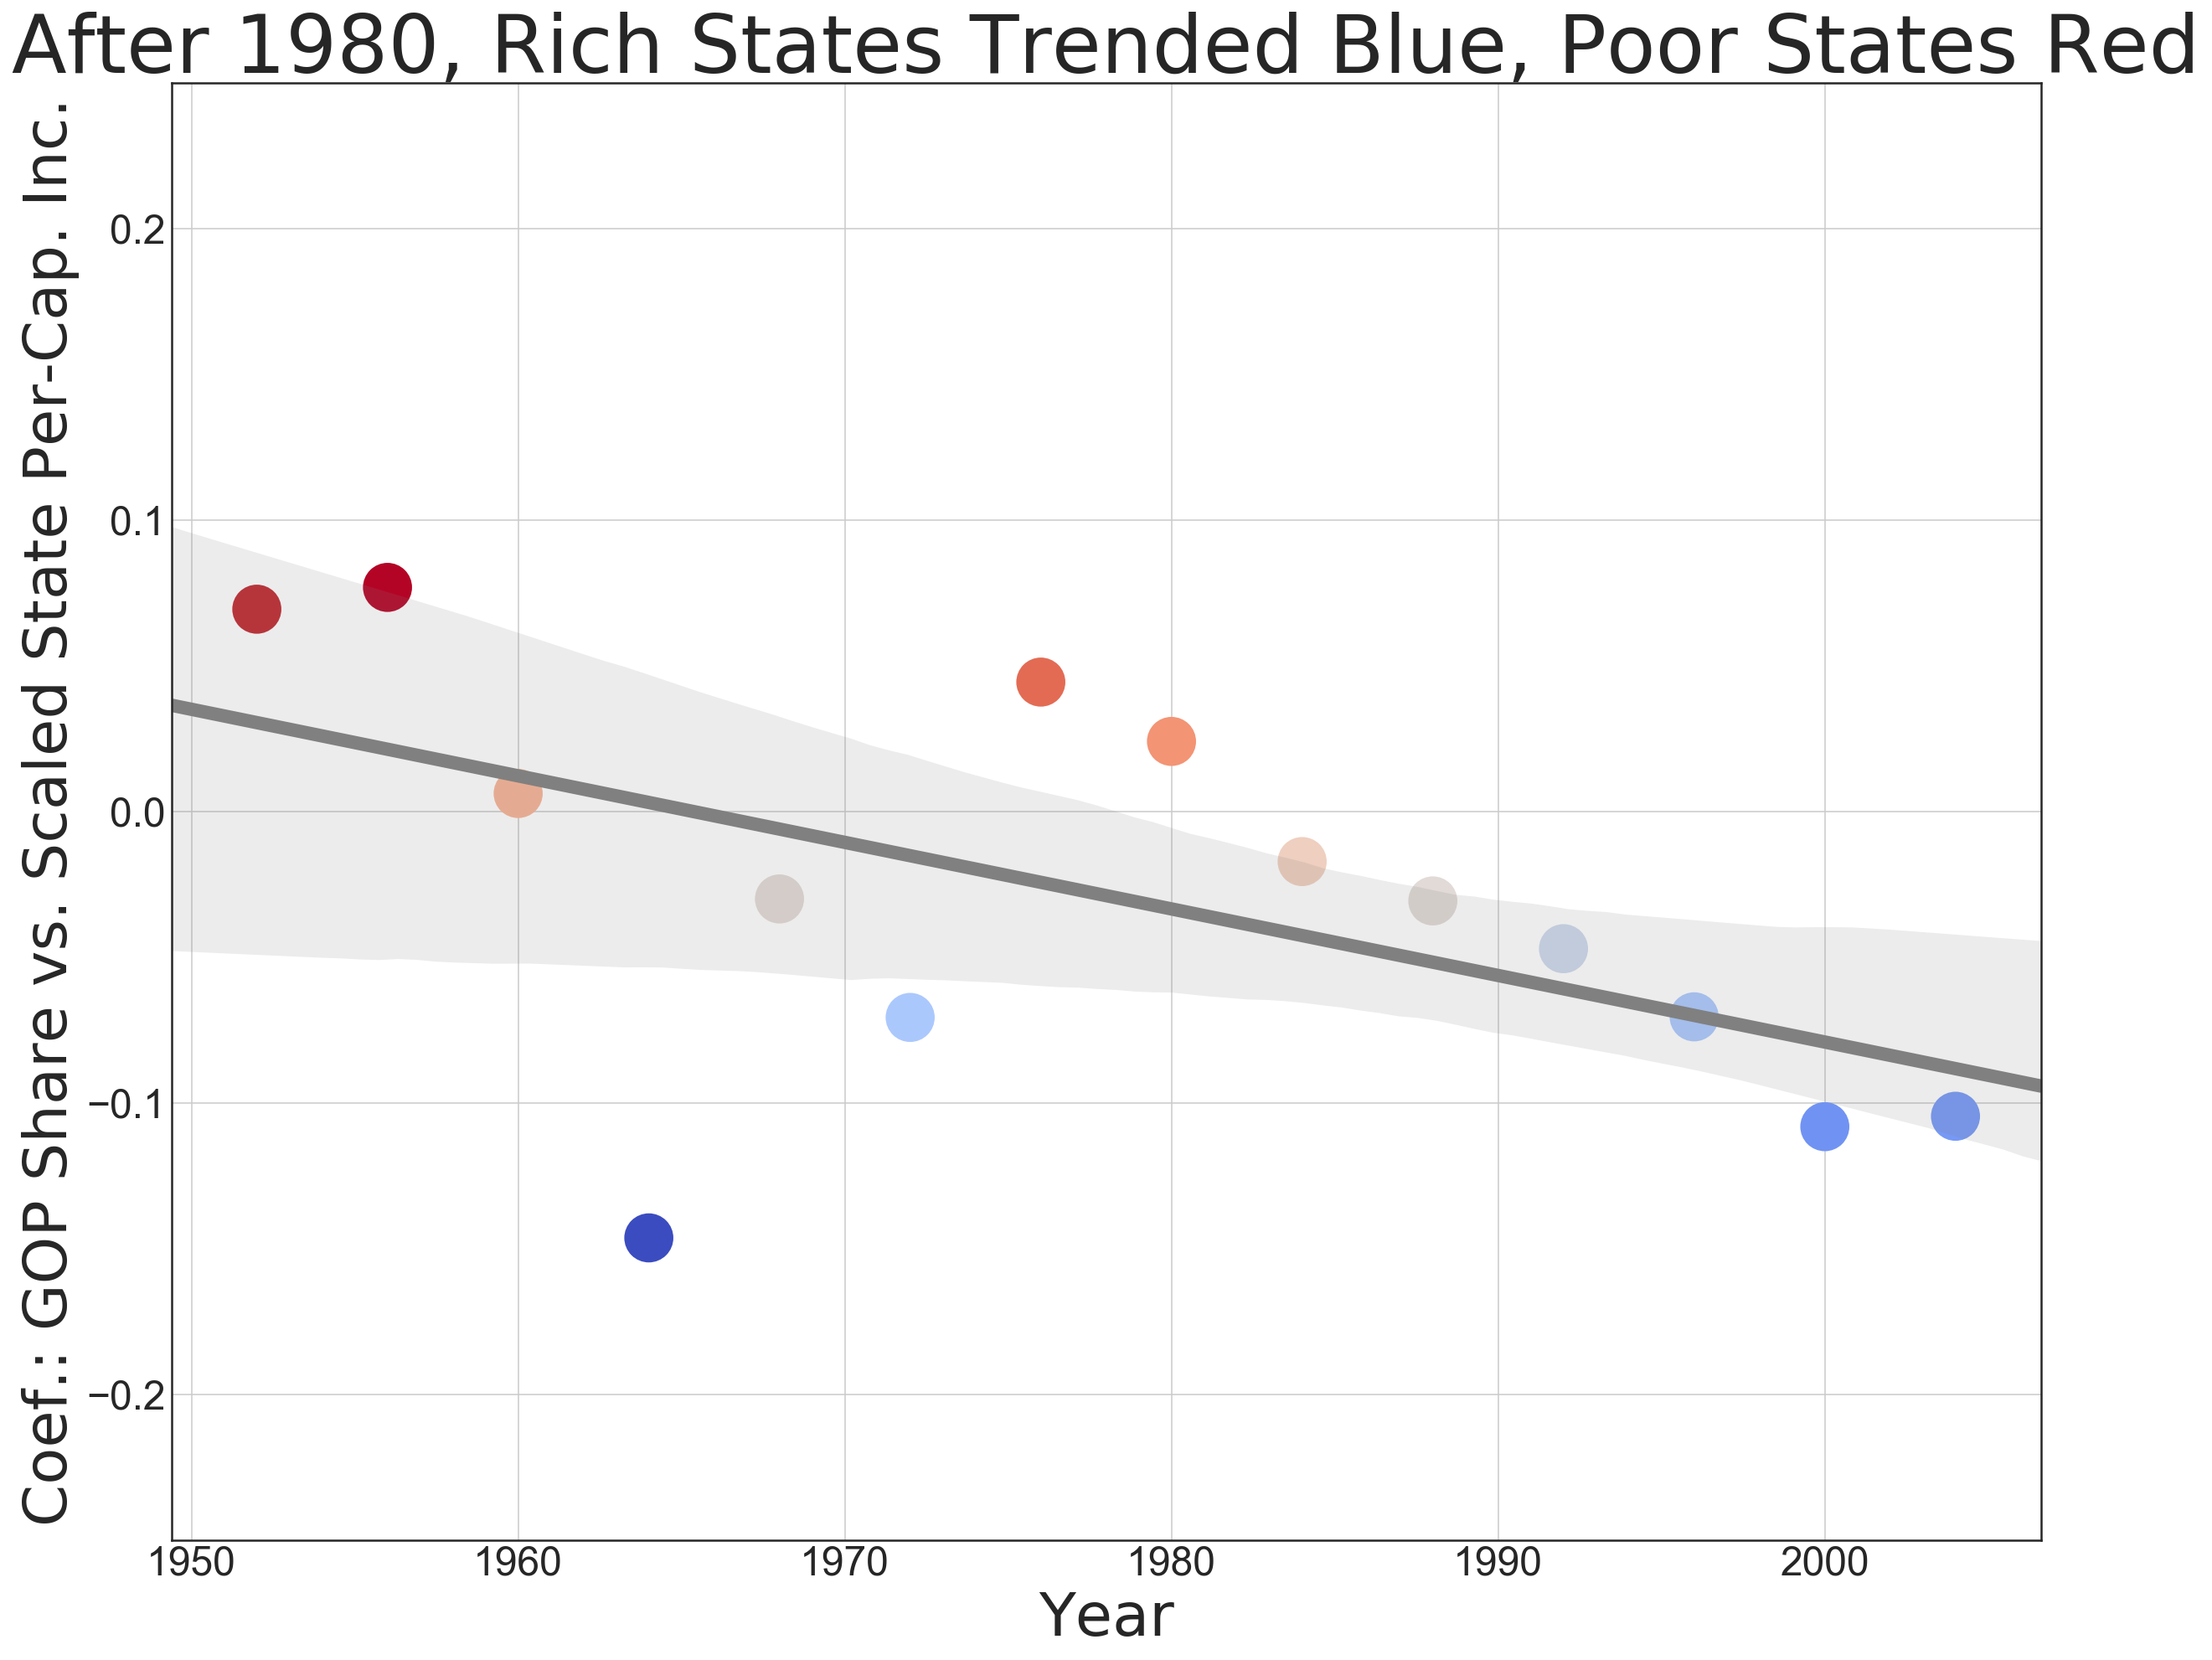

In [12]:
sns.set_style("white")
# cmap = sns.diverging_palette(250, 15, sep=1, s=90, l=60, n=20, center="dark", as_cmap=True)
fig, ax = plt.subplots(figsize=(20,16))
ax.set_ylim([-0.25,0.25])
points = plt.scatter(lr_df["Year"], lr_df["Coef"],
                     c=lr_df['Coef'], s=800, cmap="coolwarm")
sns.regplot('Year','Coef',data=lr_df, ax=ax, scatter=False, color='gray', line_kws={'lw':8})
ax.set_title('After 1980, Rich States Trended Blue, Poor States Red',
             fontdict={'fontsize':48,'fontname':'Franklin Gothic Medium'})
ax.set_xlabel('Year', fontdict={'fontsize':36, 'fontname':'Franklin Gothic Medium'})
ax.set_ylabel('Coef.: GOP Share vs. Scaled State Per-Cap. Inc.',
              fontdict={'fontsize':36, 'fontname':'Franklin Gothic Medium'})
ax.tick_params(axis='both', which='major', labelsize=24)
ax.grid()

### With 2008-2016 Included

```python
['figure-1-lr_df.csv',
 'results-2008-2016.csv',
 'SA1-income-melt-1960-2016.csv',
 'SA1-percapinc_infadj-1960-2016.csv']
```

In [13]:
results_0816 = pd.read_csv('./results-2008-2016.csv')
inc_19602016 = pd.read_csv('./SA1-income-melt-1960-2016.csv')

In [15]:
from easymoney.money import EasyPeasy

In [16]:
inc_inf96_19602016 = pd.DataFrame(data=inc_19602016)

In [17]:
inc_inf96_19602016.head()

,GeoFips,GeoName,Year,st.income,st.pop,incpop
0,0,United States,1960,418095000,179972000,2323
1,1,Alabama,1960,5216067,3274000,1593
2,2,Alaska,1960,807217,229000,3525
3,4,Arizona,1960,2833481,1321000,2145
4,5,Arkansas,1960,2557904,1789000,1430


In [18]:
yr_income = [[year,income] for year, income in zip(inc_inf96_19602016['Year'].values,inc_inf96_19602016['st.income'].values)]
yr_incpop = [[year,income] for year, income in zip(inc_inf96_19602016['Year'].values,inc_inf96_19602016['incpop'].values)]

In [19]:
ep = EasyPeasy()

In [20]:
inc_inf96_19602016['st.inc.inf96'] = [ep.inflation_calculator(float(row[1]),'US',int(row[0]),1996) for row in yr_income]
inc_inf96_19602016['incpop.inf96'] = [ep.inflation_calculator(float(row[1]),'US',int(row[0]),1996) for row in yr_incpop]

In [21]:
inc_inf96_19602016.head()

,GeoFips,GeoName,Year,st.income,st.pop,incpop,st.inc.inf96,incpop.inf96
0,0,United States,1960,418095000,179972000,2323,2.215865e+09,12311.69
1,1,Alabama,1960,5216067,3274000,1593,2.764467e+07,8442.75
2,2,Alaska,1960,807217,229000,3525,4.278176e+06,18682.18
3,4,Arizona,1960,2833481,1321000,2145,1.501719e+07,11368.30
4,5,Arkansas,1960,2557904,1789000,1430,1.355666e+07,7578.87


In [22]:
inc_inf96_19602016['GeoName'].unique()

array(['United States', 'Alabama', 'Alaska', 'Arizona', 'Arkansas',
       'California', 'Colorado', 'Connecticut', 'Delaware',
       'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming', 'New England', 'Mideast',
       'Great Lakes', 'Plains', 'Southeast', 'Southwest', 'Rocky Mountain',
       'Far West'], dtype=object)

In [23]:
inc_usa_inf96 = pd.DataFrame(data=inc_inf96_19602016[inc_inf96_19602016['GeoName'] == 'United States'])
inc_usa_inf96.drop('GeoFips', axis=1, inplace=True)

In [24]:
geodrop = ['United States','District of Columbia', 'New England', 'Mideast',
           'Great Lakes', 'Plains', 'Southeast', 'Southwest', 'Rocky Mountain', 'Far West']

In [25]:
loc_keep = []
loc_drop = []
for i in inc_inf96_19602016.iterrows():
    if i[1][1] not in geodrop:
        loc_keep.append(i[0])
    else:
        loc_drop.append(i[0])

In [26]:
inc_st_inf96 = inc_inf96_19602016.drop(labels=loc_drop, axis=0)

In [27]:
inc_st_inf96.drop('GeoFips', axis=1,inplace=True)

In [28]:
z_stpop = []
for year in list(inc_st_inf96['Year'].unique()):
    values = inc_st_inf96[inc_st_inf96['Year'] == year]['st.pop'].values
    z = stats.zscore(values)
    for i in z:
        z_stpop.append(i)
inc_st_inf96['z.st.pop'] = z_stpop

In [29]:
(inc_st_inf96[inc_st_inf96['Year'] == 1988]['z.st.pop'].values)/(st[st['year'] == 1988].sort_values(by=['year','state'], axis=0)['z.st.pop'].values)

array([ 2.02030509,  2.02030509,  2.02030509,  2.02030509,  2.02030509,
        2.02030509,  2.02030509,  2.02030509,  2.02030509,  2.02030509,
        2.02030509,  2.02030509,  2.02030509,  2.02030509,  2.02030509,
        2.02030509,  2.02030509,  2.02030509,  2.02030509,  2.02030509,
        2.02030509,  2.02030509,  2.02030509,  2.02030509,  2.02030509,
        2.02030509,  2.02030509,  2.02030509,  2.02030509,  2.02030509,
        2.02030509,  2.02030509,  2.02030509,  2.02030509,  2.02030509,
        2.02030509,  2.02030509,  2.02030509,  2.02030509,  2.02030509,
        2.02030509,  2.02030509,  2.02030509,  2.02030509,  2.02030509,
        2.02030509,  2.02030509,  2.02030509,  2.02030509,  2.02030509])

Interesting. The z-scores aren't the same, but somehow the ratios of the z-scores are. Why is that?

In [31]:
inc_usa = pd.DataFrame(data=inc_19602016[inc_19602016['GeoName'] == 'United States'])
inc_usa.drop('GeoFips', axis=1,inplace=True)

z_inc = []
for year in list(inc_st_inf96['Year'].unique()):
    values = inc_st_inf96[inc_st_inf96['Year'] == year]['st.inc.inf96'].values
    z = stats.zscore(values)
    for i in z:
        z_inc.append(i)
inc_st_inf96['z.inc.inf96'] = z_inc

z_incpop = []
for year in list(inc_st_inf96['Year'].unique()):
    values = inc_st_inf96[inc_st_inf96['Year'] == year]['z.inc.inf96']/inc_st_inf96[inc_st_inf96['Year'] == year]['st.pop']
    z = stats.zscore(values)
    for i in z:
        z_incpop.append(i)
inc_st_inf96['z.incpop.inf96'] = z_incpop

In [34]:
inc_usa[inc_usa['Year'] == year]['incpop']

loc_keep = []
loc_drop = []
for i in inc_19602016.iterrows():
    if i[1][1] not in geodrop:
        loc_keep.append(i[0])
    else:
        loc_drop.append(i[0])
inc_st = inc_19602016.drop(labels=loc_drop, axis=0)
inc_st.drop('GeoFips', axis=1,inplace=True)
inc_st['z.st.pop'] = z_stpop

z_inc = []
for year in list(inc_st['Year'].unique()):
    values = inc_st[inc_st['Year'] == year]['st.income'].values
    z = stats.zscore(values)
    for i in z:
        z_inc.append(i)
inc_st['z.st.inc'] = z_inc

z_incpop = []
for year in list(inc_st['Year'].unique()):
    values = inc_st_inf96[inc_st['Year'] == year]['z.inc.inf96']/inc_st[inc_st['Year'] == year]['st.pop']
    z = stats.zscore(values)
    for i in z:
        z_incpop.append(i)
inc_st['z.incpop.inf96'] = z_incpop

In [35]:
inc_st.columns

Index(['GeoName', 'Year', 'st.income', 'st.pop', 'incpop', 'st.inc.inf96',
       'incpop.inf96', 'z.st.pop', 'z.st.inc', 'z.incpop.inf96'],
      dtype='object')

In [37]:
# inc_st[inc_st['Year'] <= 2004][['z.st.pop','z.st.inc','z.st.incpop']].values/(st[st['year'] >=1960].sort_values(by=['year','state'], axis=0)[['z.st.pop','z.st.inc','z.st.inc.pop']].values)

In [ ]:
# inc_st_1960 = inc_st[inc_st['Year'] == 1960]
# inc_st_1964 = inc_st[inc_st['Year'] == 1964]
# inc_st_1968 = inc_st[inc_st['Year'] == 1968]
# inc_st_1972 = inc_st[inc_st['Year'] == 1972]
# inc_st_1976 = inc_st[inc_st['Year'] == 1976]
# inc_st_1980 = inc_st[inc_st['Year'] == 1980]
# inc_st_1984 = inc_st[inc_st['Year'] == 1984]
# inc_st_1988 = inc_st[inc_st['Year'] == 1988]
# inc_st_1992 = inc_st[inc_st['Year'] == 1992]
# inc_st_1996 = inc_st[inc_st['Year'] == 1996]
# inc_st_2000 = inc_st[inc_st['Year'] == 2000]
# inc_st_2004 = inc_st[inc_st['Year'] == 2004]
# inc_st_2008 = inc_st[inc_st['Year'] == 2008]
# inc_st_2012 = inc_st[inc_st['Year'] == 2012]
# inc_st_2016 = inc_st[inc_st['Year'] == 2016]

In [38]:
results_0816 = pd.read_csv('results-2008-2016.csv')
results_0816.columns=['State','Total','DemTotal','RepTotal','DemShare','RepShare','Year']

In [39]:
st_results_0816 = results_0816[results_0816['State'] != 'D. C.']

In [40]:
np.sum([len(st[st['year'] == i]['st.repshare']) for i in range(1960,2008,4)])

600

In [41]:
model_results = []

years = range(1960,2008,4)

for i in years:
    X = sm.add_constant(stats.zscore(inc_st[inc_st['Year'] == i][['incpop.inf96']].values)/2.0231)
    y = st[st['year'] == i]['st.repshare']
    model = sm.OLS(y, X).fit()
    coef = model.params[1]
    intercept = model.params[0]
    r2 = model.rsquared
    fitted = model.fittedvalues
    coef_t = model.tvalues[1]
    intercept_t = model.tvalues[0]
    model_results.append({'Year':i, 'Coef':coef, 'Intercept':intercept, 'R2':r2,
                             'Coef t':coef_t, 'Intercept t':intercept_t})

years = range(2008,2017,4)

for i in years:
    X = sm.add_constant(stats.zscore(inc_st[inc_st['Year'] == i][['incpop.inf96']].values)/2.0231)
    y = st_results_0816[st_results_0816['Year'] == i]['RepShare']
    model = sm.OLS(y, X).fit()
    coef = model.params[1]
    intercept = model.params[0]
    r2 = model.rsquared
    fitted = model.fittedvalues
    coef_t = model.tvalues[1]
    intercept_t = model.tvalues[0]
    model_results.append({'Year':i, 'Coef':coef, 'Intercept':intercept, 'R2':r2,
                             'Coef t':coef_t, 'Intercept t':intercept_t})

In [42]:
model_results

[{'Coef': 0.0065722080093762059,
  'Coef t': 0.39172807525262165,
  'Intercept': 0.5058893783338333,
  'Intercept t': 61.002314006631792,
  'R2': 0.0031867058771711809,
  'Year': 1960},
 {'Coef': -0.14650276008946272,
  'Coef t': -4.5452996746787067,
  'Intercept': 0.41667804730736702,
  'Intercept t': 26.153793196110577,
  'R2': 0.30090044594722631,
  'Year': 1964},
 {'Coef': -0.029459750590981302,
  'Coef t': -1.4482397641402927,
  'Intercept': 0.52020858845605267,
  'Intercept t': 51.737598946305489,
  'R2': 0.041866413842214789,
  'Year': 1968},
 {'Coef': -0.06406104075551311,
  'Coef t': -3.7001343709896242,
  'Intercept': 0.64023554862933629,
  'Intercept t': 74.81361496966241,
  'R2': 0.22192857328145266,
  'Year': 1972},
 {'Coef': 0.044515931995411873,
  'Coef t': 2.6315694382151631,
  'Intercept': 0.50117149402690964,
  'Intercept t': 59.938114190354938,
  'R2': 0.12608352888025909,
  'Year': 1976},
 {'Coef': 0.023894856094194991,
  'Coef t': 1.0287738454163249,
  'Intercept':

In [43]:
lr_df_0816 = pd.DataFrame(model_results)

In [44]:
lr_df_19522016 = lr_df[['Year','Coef']].merge(lr_df_0816, on='Year', how='outer', suffixes=('_Gelman', '_Kollipara'))

In [45]:
koll0816_coef = list(lr_df_19522016[lr_df_19522016['Year'] > 2007]['Coef_Kollipara'])
gelman_coef = list(lr_df_19522016[lr_df_19522016['Year'] < 2007]['Coef_Gelman'])
koll_coef = list(lr_df_19522016[lr_df_19522016['Year'] > 1959]['Coef_Kollipara'])
gel5256_coef = list(lr_df_19522016[lr_df_19522016['Year'] < 1959]['Coef_Gelman'])
gel_koll0816_coef = gelman_coef
gel5256_koll_coef = gel5256_coef

In [46]:
for i in koll0816_coef:
    gel_koll0816_coef.append(i)
for j in koll_coef:
    gel5256_koll_coef.append(j)

In [47]:
lr_df_19522016['gel_koll0816_coef'] = gel_koll0816_coef
lr_df_19522016['gel5256_koll_coef'] = gel5256_koll_coef

/Users/pk/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['Franklin Gothic Medium'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


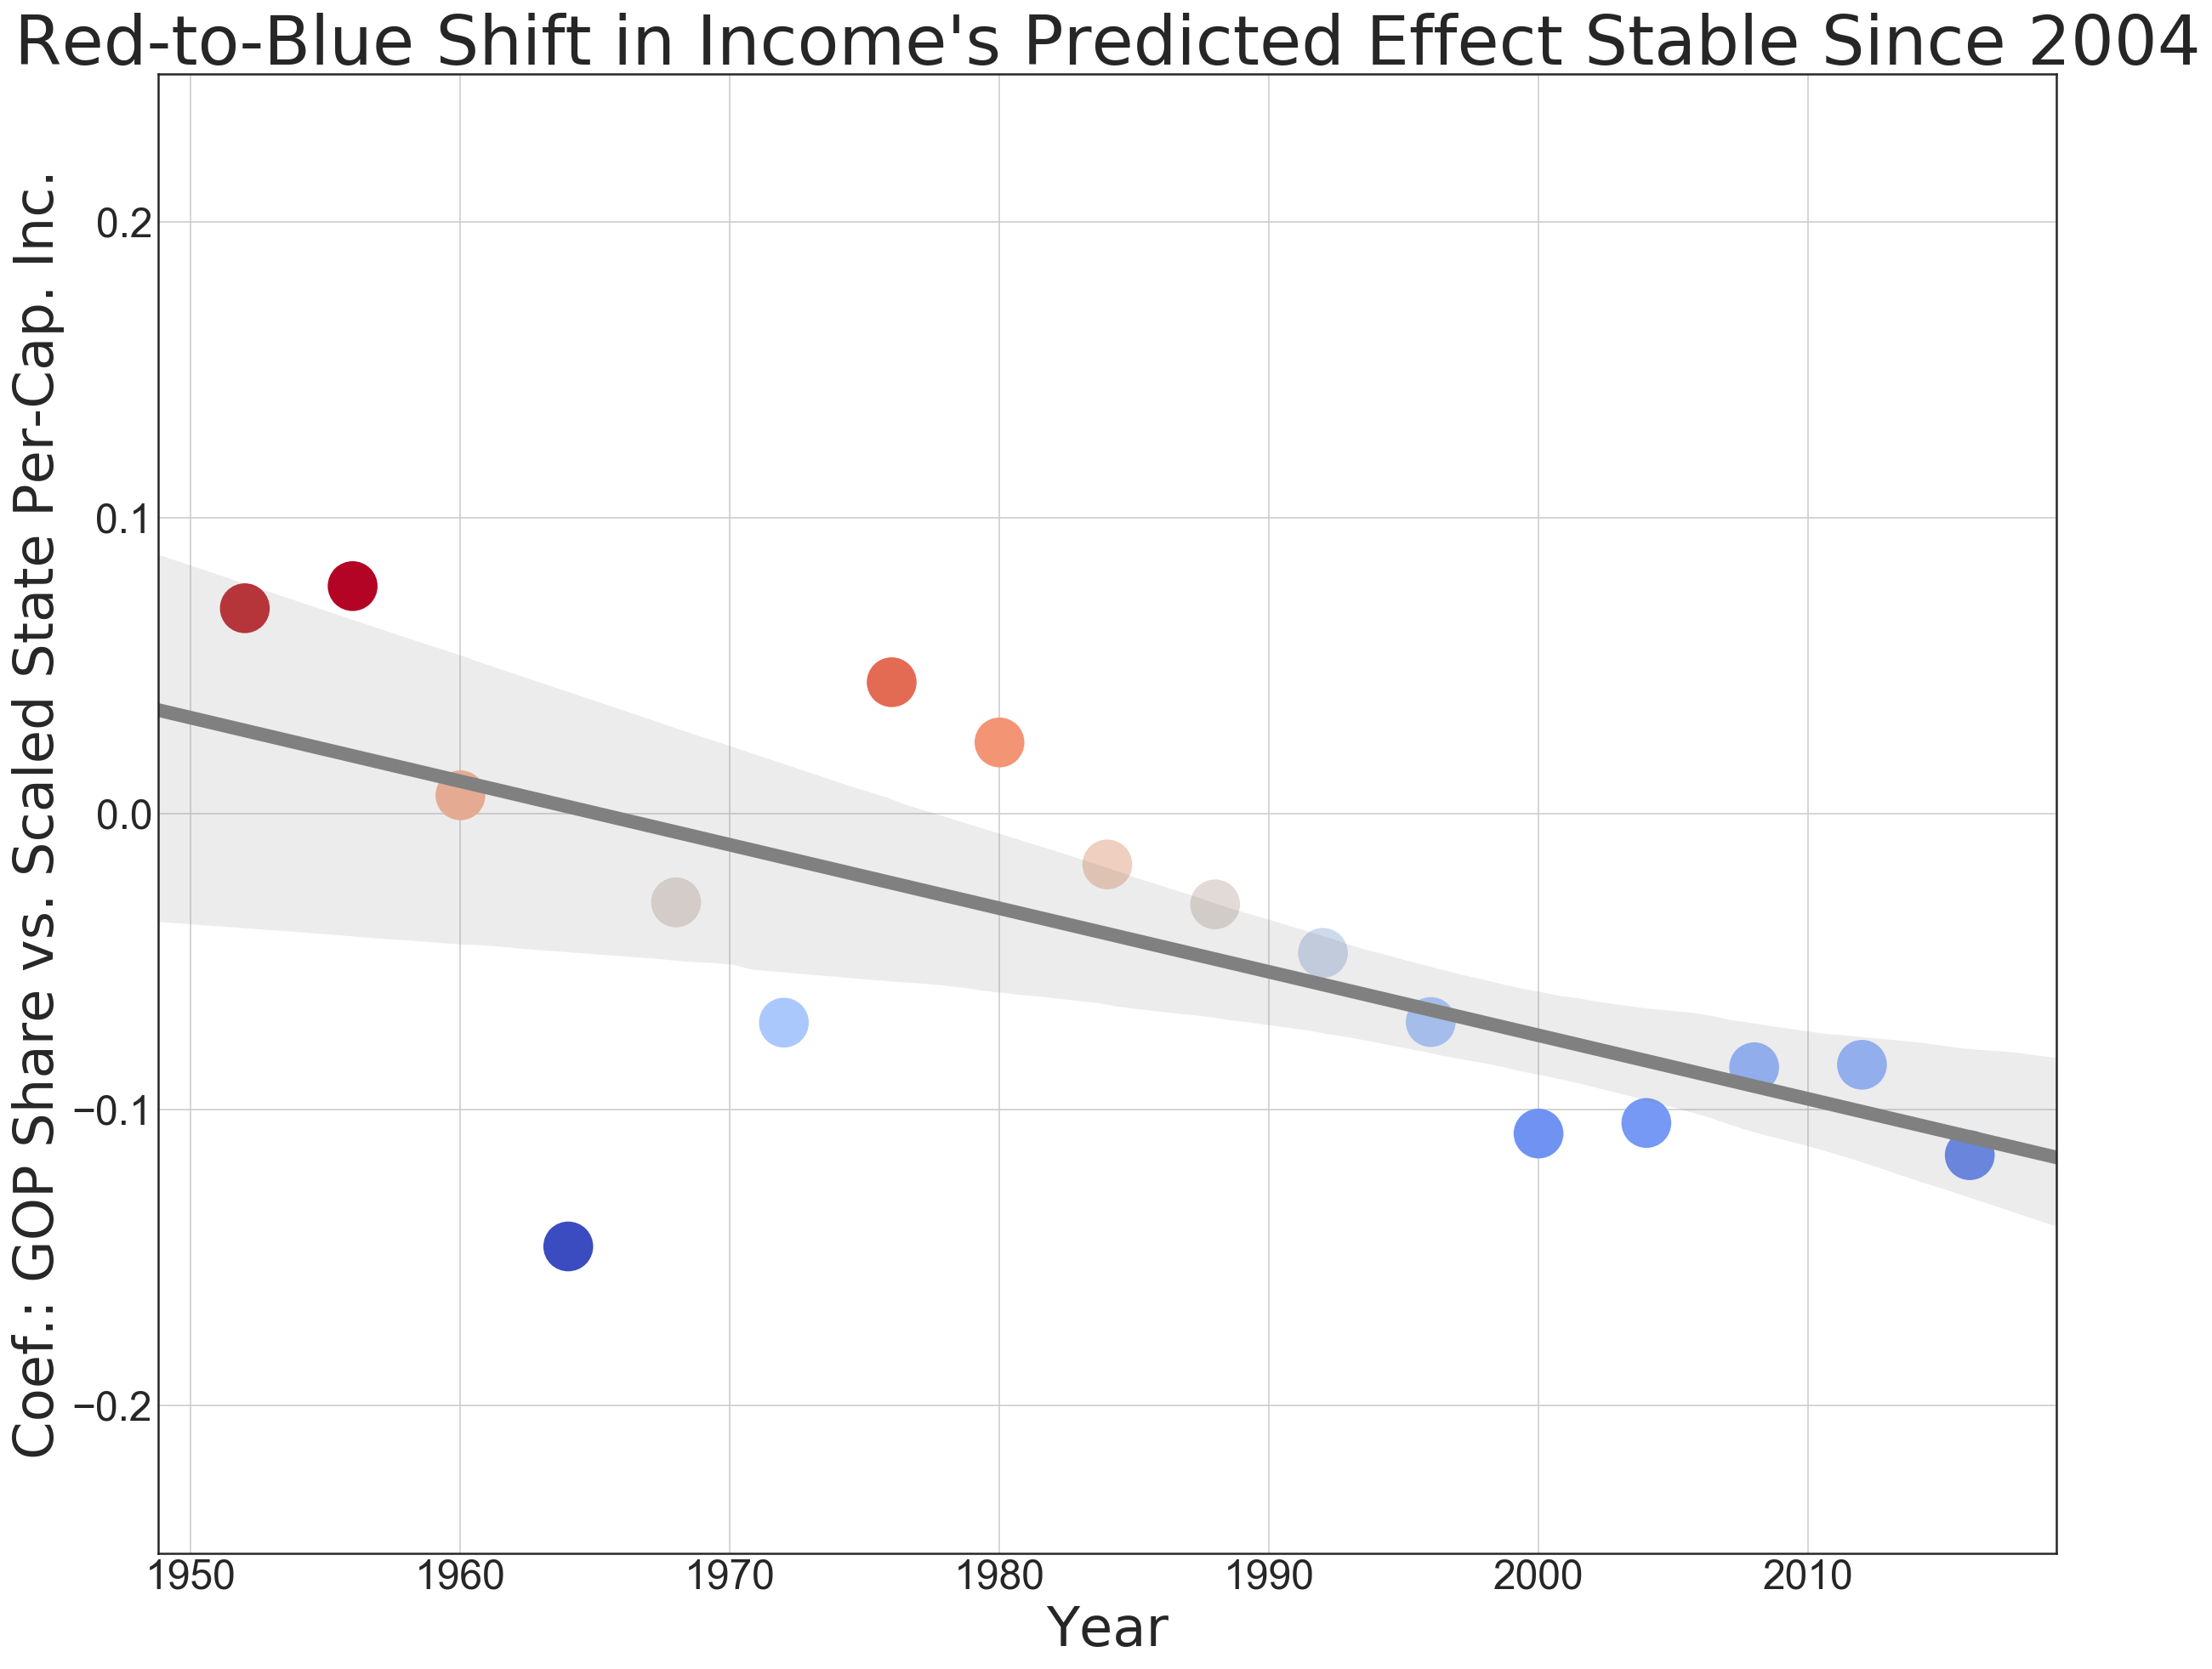

In [48]:
sns.set_style("white")
# cmap = sns.diverging_palette(250, 15, sep=1, s=90, l=60, n=20, center="dark", as_cmap=True)
fig, ax = plt.subplots(figsize=(20,16))
ax.set_ylim([-0.25,0.25])
points = plt.scatter(lr_df_19522016["Year"], lr_df_19522016['gel_koll0816_coef'],
                     c=lr_df_19522016['gel_koll0816_coef'], s=800, cmap="coolwarm")
sns.regplot(lr_df_19522016['Year'],lr_df_19522016['gel_koll0816_coef'],
            scatter=False, color='gray', line_kws={'lw':8})
ax.set_title('Red-to-Blue Shift in Income\'s Predicted Effect Stable Since 2004',
             fontdict={'fontsize':40,'fontname':'Franklin Gothic Medium'})
ax.set_xlabel('Year', fontdict={'fontsize':32, 'fontname':'Franklin Gothic Medium'})
ax.set_ylabel(u'Coef.: GOP Share vs. Scaled State Per-Cap. Inc.',
              fontdict={'fontsize':32, 'fontname':'Franklin Gothic Medium'})
ax.tick_params(axis='both', which='major', labelsize=24)
ax.grid()

/Users/pk/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['Franklin Gothic Medium'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


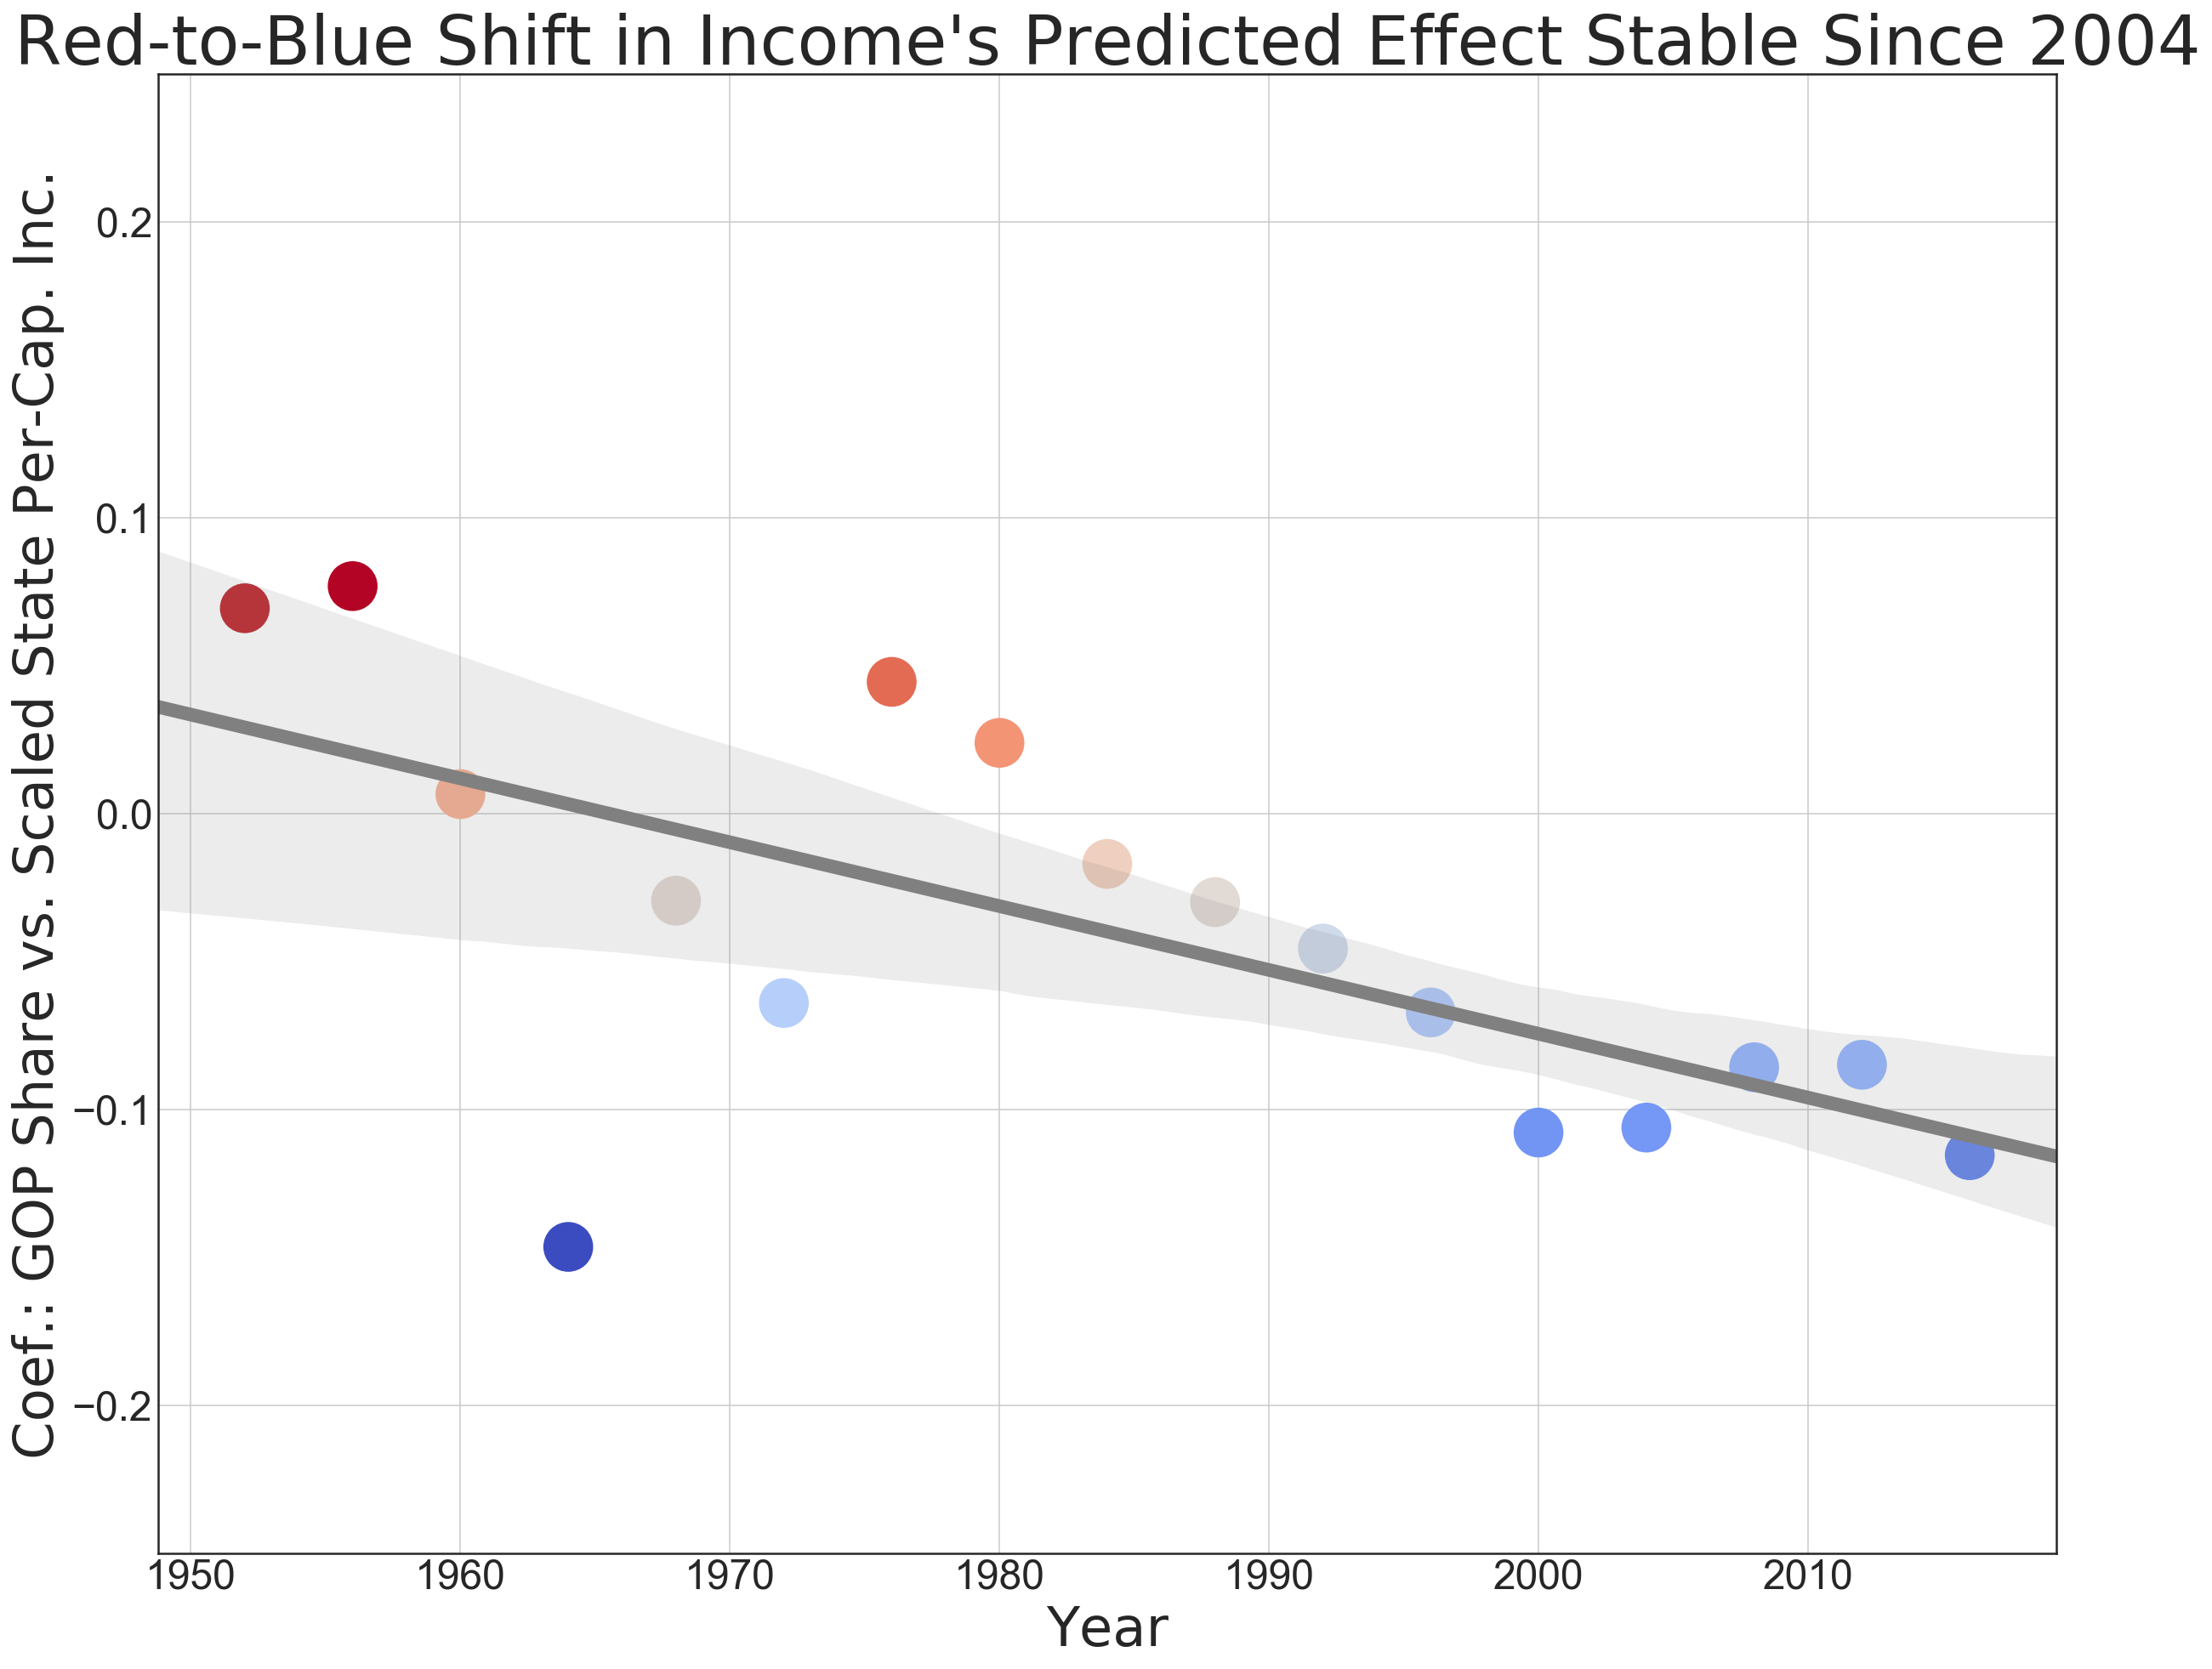

In [49]:
sns.set_style("white")
# cmap = sns.diverging_palette(250, 15, sep=1, s=90, l=60, n=20, center="dark", as_cmap=True)
fig, ax = plt.subplots(figsize=(20,16))
ax.set_ylim([-0.25,0.25])
points = plt.scatter(lr_df_19522016["Year"], lr_df_19522016['gel5256_koll_coef'],
                     c=lr_df_19522016['gel5256_koll_coef'],s=800, cmap="coolwarm")
sns.regplot(lr_df_19522016['Year'],lr_df_19522016['gel5256_koll_coef'],
            scatter=False, color='gray', line_kws={'lw':8})
ax.set_title('Red-to-Blue Shift in Income\'s Predicted Effect Stable Since 2004',
             fontdict={'fontsize':40,'fontname':'Franklin Gothic Medium'})
ax.set_xlabel('Year', fontdict={'fontsize':32, 'fontname':'Franklin Gothic Medium'})
ax.set_ylabel('Coef.: GOP Share vs. Scaled State Per-Cap. Inc.',
              fontdict={'fontsize':32, 'fontname':'Franklin Gothic Medium'})
ax.tick_params(axis='both', which='major', labelsize=24)
ax.grid()

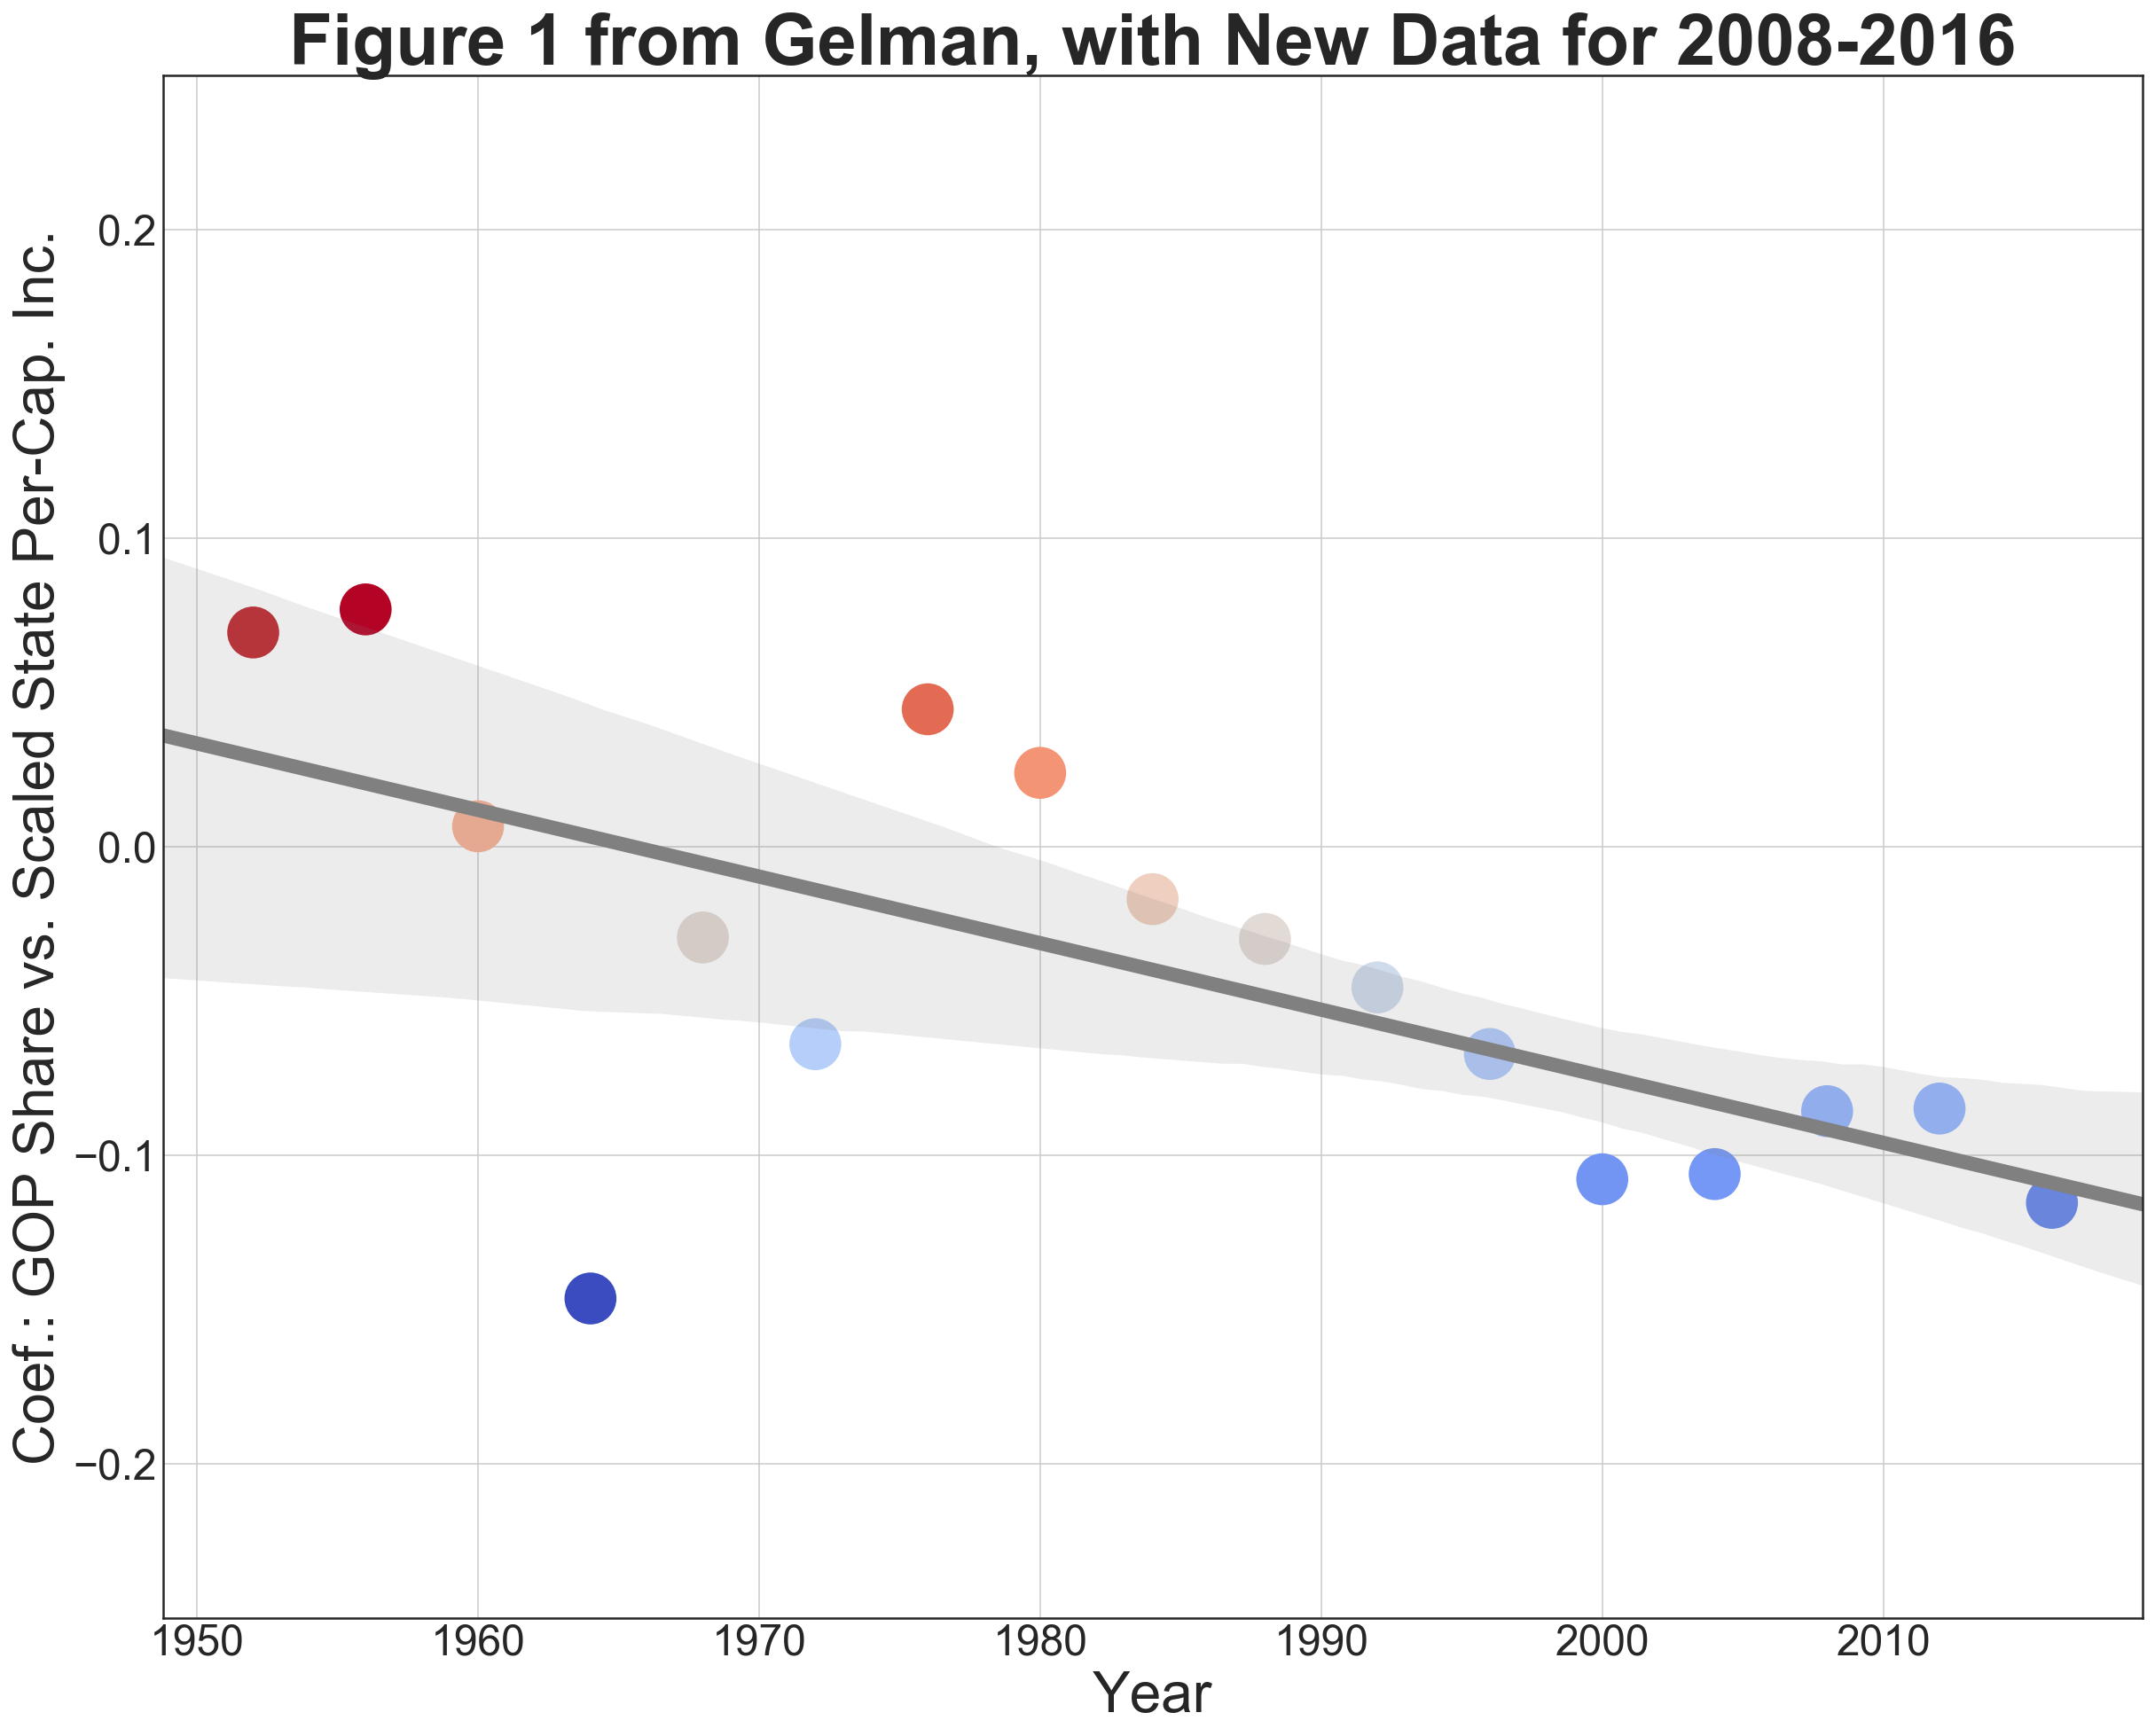

In [57]:
sns.set_style("white")
# cmap = sns.diverging_palette(250, 15, sep=1, s=90, l=60, n=20, center="dark", as_cmap=True)
fig, ax = plt.subplots(figsize=(20,16))
ax.set_ylim([-0.25,0.25])
points = plt.scatter(lr_df_19522016["Year"], lr_df_19522016['gel5256_koll_coef'],
                     c=lr_df_19522016['gel5256_koll_coef'],s=800, cmap="coolwarm")
sns.regplot(lr_df_19522016['Year'],lr_df_19522016['gel5256_koll_coef'],
            scatter=False, color='gray', line_kws={'lw':8})
ax.set_title('Figure 1 from Gelman, with New Data for 2008-2016',
             fontdict={'fontsize':40,'fontname':'Arial','fontweight':'bold'})
ax.set_xlabel('Year', fontdict={'fontsize':32, 'fontname':'Arial'})
ax.set_ylabel('Coef.: GOP Share vs. Scaled State Per-Cap. Inc.',
              fontdict={'fontsize':32, 'fontname':'Arial'})
ax.tick_params(axis='both', which='major', labelsize=24)
ax.grid()

In [54]:
lr_df_19522016[['Year','gel_koll0816_coef','gel5256_koll_coef']]

,Year,gel_koll0816_coef,gel5256_koll_coef
0,1952,0.069406,0.069406
1,1956,0.076889,0.076889
2,1960,0.006163,0.006572
3,1964,-0.146350,-0.146503
4,1968,-0.030032,-0.029460
5,1972,-0.070693,-0.064061
6,1976,0.044393,0.044516
7,1980,0.024031,0.023895
8,1984,-0.017204,-0.017041
9,1988,-0.030707,-0.029947


---

## Part 2: Individual Income-Vote Modeling, National

## Part 3: Individual Income-Vote Modeling, State

In [51]:
import theano
from pymc3 import Model, sample, Normal, HalfCauchy, Uniform
path = '../../../Large Datasets/capstone/feather/'
filelist = os.listdir(path)
filelist = [file for file in filelist if file.endswith('.feather')]

In [52]:
filelist

['2000_labeled_processed_race.feather',
 '1996_labeled_processed_race.feather',
 'cumulative_2006_2016_dta.feather',
 '1984_labeled_processed_race.feather',
 'cces_cumul_0616_rds.feather',
 '1988_labeled_processed_race.feather',
 'avgincome_orig.feather',
 'fips.icpsr.cbs.naes.feather',
 'annen2004_processed.feather',
 'anes_timeseries_2016_voteval.feather',
 '2004_labeled_processed_race.feather',
 'region_dummies_84.feather',
 '1992_labeled_processed_race.feather',
 'anes_timeseries_cdf.feather',
 'region_dummies.feather',
 'anes_timeseries_2016.feather',
 'region_indic_annen2000.feather',
 'annen061229.feather']

In [53]:
with Model() as varying_intercept_slope:

    # Priors
    mu_a = Normal('mu_a', mu=0., sd=1e5)
    sigma_a = HalfCauchy('sigma_a', 5)
    mu_b = Normal('mu_b', mu=0., sd=1e5)
    sigma_b = HalfCauchy('sigma_b', 5)

    # Random intercepts
    a = Normal('a', mu=mu_a, sd=sigma_a, shape=counties)
    # Random slopes
    b = Normal('b', mu=mu_b, sd=sigma_b, shape=counties)

    # Model error
    sigma_y = Uniform('sigma_y', lower=0, upper=100)

    # Expected value
    y_hat = a[county] + b[county] * floor_measure

    # Data likelihood
    y_like = Normal('y_like', mu=y_hat, sd=sigma_y, observed=log_radon)

NameError: name 'counties' is not defined

### Part 4: Individual Income-Vote Modeling, Counties Within State (Optional)

In [ ]:
with Model() as varying_intercept_slope:

    # Priors
    mu_a = Normal('mu_a', mu=0., sd=1e5)
    sigma_a = HalfCauchy('sigma_a', 5)
    mu_b = Normal('mu_b', mu=0., sd=1e5)
    sigma_b = HalfCauchy('sigma_b', 5)

    # Random intercepts
    a = Normal('a', mu=mu_a, sd=sigma_a, shape=counties)
    # Random slopes
    b = Normal('b', mu=mu_b, sd=sigma_b, shape=counties)

    # Model error
    sigma_y = Uniform('sigma_y', lower=0, upper=100)

    # Expected value
    y_hat = a[county] + b[county] * floor_measure

    # Data likelihood
    y_like = Normal('y_like', mu=y_hat, sd=sigma_y, observed=log_radon)